Files already downloaded and verified
Files already downloaded and verified


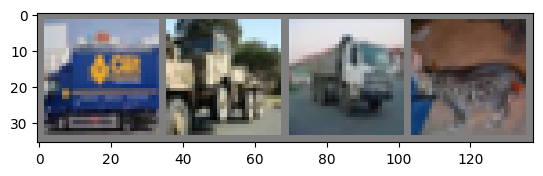

truck truck truck cat  


In [1]:
from model import *
from utils import imshow

In [2]:
device = 'cpu'
if torch.backends.mps.is_available(): # type: ignore
    device = 'mps'  # enables training on the Macbook Pro's GPU
elif torch.cuda.is_available():
    device = 'cuda:0'

print(device)

net.to(device)

mps


Net(
  (conv1): Conv2d(3, 18, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(18, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [3]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.147
[1,  4000] loss: 1.777
[1,  6000] loss: 1.633
[1,  8000] loss: 1.522
[1, 10000] loss: 1.463
[1, 12000] loss: 1.414
[2,  2000] loss: 1.338
[2,  4000] loss: 1.275
[2,  6000] loss: 1.286
[2,  8000] loss: 1.255
[2, 10000] loss: 1.243
[2, 12000] loss: 1.184
Finished Training


In [4]:
PATH = './cifar_net_gpu.pth'
torch.save(net.state_dict(), PATH)

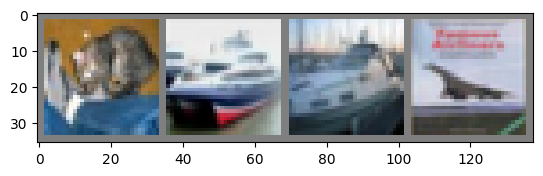

GroundTruth:  cat   ship  ship  plane


In [5]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [6]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [7]:
outputs = net(images)

In [8]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  cat   car   plane ship 


In [9]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 57 %


In [10]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 58.5 %
Accuracy for class: car   is 71.4 %
Accuracy for class: bird  is 31.5 %
Accuracy for class: cat   is 26.9 %
Accuracy for class: deer  is 39.7 %
Accuracy for class: dog   is 63.8 %
Accuracy for class: frog  is 84.0 %
Accuracy for class: horse is 66.4 %
Accuracy for class: ship  is 65.8 %
Accuracy for class: truck is 68.6 %
